# 2.1. Data Manipulation

2.1.1 Getting Started

In [ ]:
import torch

In [ ]:
x=torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
x.numel()

12

In [ ]:
x.shape

torch.Size([12])

In [ ]:
X = x.reshape(3,4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
x = torch.randn(3,4)

In [ ]:
# Calculate average
float(x.sum()/x.numel())

0.4162980616092682

2.1.2 Indexing and Slicing

In [ ]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [ ]:
X[1,2] = 17 # equivalent to X[1][2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X[:2,:]=12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

2.1.3. Operations

In [ ]:
torch.exp(x)

tensor([[ 1.2840, 11.2529,  1.3873,  2.0851],
        [ 0.8456,  0.7780,  0.3780,  1.4809],
        [ 0.5295,  0.4028,  8.5028,  5.2924]])

In [ ]:
x

tensor([[ 0.2500,  2.4206,  0.3273,  0.7348],
        [-0.1677, -0.2510, -0.9727,  0.3926],
        [-0.6359, -0.9092,  2.1404,  1.6663]])

In [ ]:
x = torch.tensor( [1.0, 2,4,8] )
y = torch.tensor( [2,2,2,2] )
x+y, x-y, x*y, x/y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [ ]:
X = torch.arange(12, dtype = torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y), dim=0), torch.cat((X,Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X.sum()

tensor(66.)

2.1.4 Broadcasting

In [ ]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [ ]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [ ]:
before = id(Y)

In [ ]:
Y = Y+X
id(Y) == before

False

In [ ]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X+Y
print('id(Z):', id(Z))

id(Z): 138812989903936
id(Z): 138812989903936


**Comments (discussions or takeaway messages)**

In order to prevent memory leakage, we have to manipulate elements of the Tensor, not the Tensor variable.


2.1.6. Conversion to Other Python Objects

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

2.1.8. Exercises

In [ ]:
# 1. Run the code in this section.
# Change the conditional statement X == Y to X < Y or X > Y,
# and then see what kind of tensor you can get.

X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
X == Y, X<Y, X>Y

(tensor([[False,  True, False,  True],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[ True, False,  True, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]))

In [ ]:
# 2. Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors.
# Is the result the same as expected?
Z = torch.cat((X,Y),dim = 0)
X * Z

# Error throws if the Tensors are non-singleton.

RuntimeError: The size of tensor a (3) must match the size of tensor b (6) at non-singleton dimension 0

#2.2. Data Preprocessing

2.2.1 Reading the Dataset

In [ ]:
import os

In [ ]:
os.makedirs(os.path.join('..','data'), exist_ok=True)
data_file = os.path.join('..','data','house_tiny.csv')

In [ ]:
with open(data_file, 'w') as f:
  f.write("""NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000""")

In [ ]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


2.2.2. Data Preparation

In [ ]:
inputs, targets = data.iloc[:,0:2], data.iloc[:,2]
inputs = pd.get_dummies(inputs, dummy_na = True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [ ]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


**Comments (discussions or takeaway messages)**

What if each column has many types of roof? In that case, get_dummies() could generate a lot of columns.


In [ ]:
import torch
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

2.2.4 Discussion

2.2.5 Exercises

#2.3. Linear Algebra


In [ ]:
import torch

In [ ]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x+y, x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [ ]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [ ]:
x[2]

tensor(2)

In [ ]:
len(x)

3

In [ ]:
x.shape

torch.Size([3])

In [ ]:
A = torch.arange(6).reshape(3,2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [ ]:
A = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [ ]:
torch.arange(24).reshape(2,3,4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
A = torch.arange(6, dtype = torch.float32).reshape(2,3)
B = A.clone() # Assign a copy of A to B by allocating new memory
A, A+B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [ ]:
A*B #elementwise production

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [ ]:
a=2
X = torch.arange(24).reshape(2,3,4)
a+X, (a*X).shape # X+a, (X*a).shape is same

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

2.3.6 Reduction

In [ ]:
x = torch.arange(3,dtype =torch.float32)
x , x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [ ]:
A

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [ ]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [ ]:
A.shape, A.sum(axis = 0)

(torch.Size([2, 3]), tensor([3., 5., 7.]))

In [ ]:
A.shape, A.sum(axis = 0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [ ]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [ ]:
A.sum(axis=[0,1]) == A.sum()

tensor(True)

In [ ]:
A.mean(), A.sum()/A.numel()

(tensor(2.5000), tensor(2.5000))

In [ ]:
A.mean(axis = 0), A.sum(axis = 0) /A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

In [ ]:
A.mean(axis = 1)
# A.sum, A.mean always return 1 dimensional tensor
# 행의 합인지, 열의 합인지 알 수 없음. -> Non reduction Sum 사용으로 보완

tensor([1., 4.])

2.3.7 Non-Reduction Sum

In [ ]:
A

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [ ]:
sum_A = A.sum(axis = 1, keepdims = True) #각 행의 합을 각각의 행에
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [ ]:
A/sum_A #각 행의 합에 대한 비율

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [ ]:
A.cumsum(axis = 0) #cululative sum on each column

tensor([[0., 1., 2.],
        [3., 5., 7.]])

2.3.8 Dot products


In [ ]:
y = torch.ones(3,dtype = torch.float32)
x, y, torch.dot(x,y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [ ]:
torch.sum(x*y)

tensor(3.)

2.3.9. Matrix-Vector Products

In [ ]:
A, x

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([0., 1., 2.]))

In [ ]:
A.shape, x.shape, torch.mv(A,x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [ ]:
A.T

tensor([[0., 3.],
        [1., 4.],
        [2., 5.]])

**Comments (discussions or takeaway messages)**

What if the vector forms like 3*1 matrix?

```
A@x.reshape(3,1)
```

tensor([[ 5.],  
        [14.]])


@ works similarly, but returns 2*1 matrix.  
but torch.mv() doesn't work.


In [ ]:
A@x.reshape(3,1)

tensor([[ 5.],
        [14.]])

2.3.10 Matrix-Matrix Multiplication

In [ ]:
B = torch.ones(3,4)
torch.mm(A,B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

2.3.11 Norms

In [ ]:
u = torch.tensor([3.,-4.])
torch.norm(u) #L2 norm

tensor(5.)

In [ ]:
torch.abs(u).sum() #L1 norm

tensor(7.)

In [ ]:
torch.norm(torch.ones((4,9))) #Frobenius norm, norm of Matrix(모든 요소가 일렬로 된 벡터라고 간주하고 L2 norm 한것과 같음)

tensor(6.)

In [ ]:
u.reshape(2,1).reshape(1,2) #이런것도 가능

tensor([[ 3., -4.]])

#2.5 Automatic Differentiation

In [ ]:
import torch

In [ ]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
x.requires_grad_(True)

tensor([0., 1., 2., 3.], requires_grad=True)

In [ ]:
x.grad, x

(None, tensor([0., 1., 2., 3.], requires_grad=True))

In [ ]:
y = 2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

**Comments (discussions or takeaway messages)**

backward() works only if x.requires_grad is True

It throws error if backward() is called twice. Why?  

In order to fix the error, x.grad.zero_() must be called before another call of backward()

In [ ]:
x.grad == 4*x

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [ ]:
x.grad.zero_()
y = x*x
y.backward(gradient = torch.ones(len(y))) # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [ ]:
x.grad.zero_()
y = x*x
y[1].backward()
x.grad

tensor([0., 2., 0., 0.])

In [ ]:
x.grad.zero_()
y = x*x
u = y.detach() # 역전파 중단 후 값 반환 (현재의 x*x 값을 상수로 사용하고자)
z = u*x
z.sum().backward() #z = sum(x*x*x) 의 역전파가 아닌, z = sum(u*x) 의 역전파를 진행 (u는 상수)
x.grad == u

tensor([True, True, True, True])

In [ ]:
u, x, y, z

(tensor([0., 1., 4., 9.]),
 tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>),
 tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>))

In [ ]:
x.grad.zero_()
y.sum().backward() #여전히 y의 역전파는 진행 중
x.grad == 2 * x

tensor([True, True, True, True])

In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [ ]:
a = torch.randn(size = (), requires_grad = True)
d = f(a)
d.backward()

In [ ]:
a.grad == d/a

tensor(True)

#3.1 Linear Regression


In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.8 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unins

In [ ]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [ ]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [ ]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
  c[i] = a[i] + b[i]
f'{time.time()-t:.5f} sec'

'0.13491 sec'

In [ ]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec' #vector sum is faster

'0.00142 sec'

In [ ]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

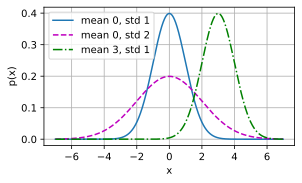

In [ ]:
x = np.arange(-7, 7, 0.01)
params = [(0,1),(0,2),(3,1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

**Comments (discussions or takeaway messages)**

Are there a type of data where simple linear regression is mort effective?

#3.2 Object-Oriented Design for Implementation

In [ ]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def add_to_class(Class):
  def wrapper(obj):
    setattr(Class, obj.__name__,obj) # 클래스에 obj 함수를 메서드로 추가
  return wrapper

In [ ]:
class A:
  def __init__(self):
    self.b = 1
a = A()

In [ ]:
@add_to_class(A) # wrapper 사용법
def do(self):
  print('Class attribute "b" is', self.b)
a.do()

Class attribute "b" is 1


In [ ]:
class HyperParameters:
  def save_hyperparameters(self,ignore=[]):
    raise NotImplemented

In [ ]:
# Call the fully implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c')) ##hasattr: 클래스에 해당 속성(변수)가 있는지 확인

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [ ]:
class ProgressBoard(d2l.HyperParameters):
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

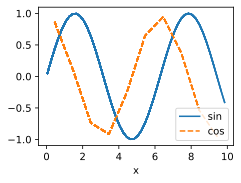

In [ ]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

In [ ]:
class Module(nn.Module, d2l.HyperParameters):
  def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch = 1):
    super().__init__()
    self.save_hyperparameters()
    self.board = d2l.ProgressBoard()
  def loss(self, y_hat, y):
    raise NotImplementedError
  def forward(self, X):
    assert hasattr(self, 'net'), 'Neural network is defined'
    return self.net(X)

  def plot(self, key, value, train):
    assert hasattr(self, 'trainer'), 'Trainer is not inited'
    self.board.xlabel = 'epoch'
    if train:
      x = self.trainer.train_batch_idx / \
           self.trainer.num_train_batches
      n = self.trainer.num_train_batches / \
          self.plot_train_per_epoch
    else:
      x = self.trainer.epoch +1
      n = self.trainer.num_val_batches / \
          self.plot_valid_per_epoch
    self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                     ('train_' if train else 'val_') + key,
                     every_n=int(n))
  def training_step(self, batch):
    l = self.loss(self(*batch[:-1]), batch[-1])
    self.plot('loss', l, train=True)
    return l

  def validation_step(self, batch):
    l = self.loss(self(*batch[:-1]), batch[-1])
    self.plot('loss', l, train=False)

  def configure_optimizers(self):
    raise NotImplementedError

NameError: name 'nn' is not defined

In [ ]:
class DataModule(d2l.HyperParameters):
  def __init__(self, root='../data', num_workers=4):
    self.save_hyperparameters()

  def get_dataloader(self,train):
    raise NotImplementedError

  def train_dataloader(self):
    return self.get_dataloader(train=True)

  def val_dataloader(self):
    return self.get_dataloader(train=False)

In [ ]:
class Trainer(d2l.HyperParameters):
  def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
    self.save_hyperparameters()
    assert num_gpus == 0, 'No GPU support yet'

  def prepare_data(self, data):
    self.train_dataloader = data.train_dataloader()
    self.val_dataloader = data.val_dataloader()
    self.num_train_batches = len(self.train_dataloader)
    self.num_val_batches = (len(self.val_dataloader)
                            if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
      model.trainer = self
      model.board.xlim = [0, self.max_epochs]
      self.model = model

    def fit(self, model, data):
      self.prepare_data(data)
      self.prepare_model(model)
      self.optim = model.configure_optimizers()
      self.epoch = 0
      self.train_batch_idx = 0
      self.val_batch_idx = 0
      for self.epoch in range(self.max_epochs):
        self.fit_epoch()

    def fit_epoch(self):
      raise NotImplementedError

**Comments (discussions or takeaway messages)**

What would be the purpose of get_dataloader and train_dataloader? What would be its structure?

# 3.4. Linear Regression Implementation from Scratch

In [ ]:
#%matplotlib inline -- It isn't necessary in Colab.

import torch
from d2l import torch as d2l

In [ ]:
class LinearRegressionScratch(d2l.Module):
  def __init__(self, num_inputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
    self.b = torch.zeros(1, requires_grad=True)

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self,X):
  return torch.matmul(X, self.w) + self.b

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self,y_hat, y):
  l = (y_hat - y) ** 2 /2
  return l.mean()

**Comments (discussions or takeaway messages)**

Why do we use half of mean squared error instead of mean squared error as loss function?

In [ ]:
class SGD(d2l.HyperParameters):
  def __init__(self, params, lr):
    self.save_hyperparameters()

  def step(self):
    for param in self.params:
      param -= self.lr * param.grad

  def zero_grad(self):
    for param in self.params:
      if param.grad is not None:
        param.grad.zero_()

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
  return SGD([self.w, self.b], self.lr)

In [ ]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self,batch):
  return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
  self.model.train()
  for batch in self.train_dataloader:
    loss = self.model.training_step(self.prepare_batch(batch))
    self.optim.zero_grad()
    with torch.no_grad():
      loss.backward()
      if self.gradient_clip_val >0:
        self.clip_gradients(self.gradient_clap_val, self.model)
      self.optim.step()
      self.train_batch_idx += 1
  if self.val_dataloader is None:
    return
  self.model.eval()
  for batch in self.val_dataloader:
    with torch.no_grad():
      self.model.validation_step(self.prepare_batch(batch))
      self.val_batch_idx += 1

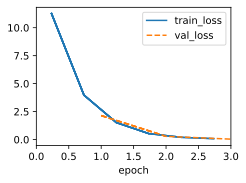

In [ ]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [ ]:
with torch.no_grad():
  print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
  print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.0924, -0.1588])
error in estimating b: tensor([0.2026])


# 4.1. Softmax Regression

**Comments (discussions or takeaway messages)**

Cross-Entropy Loss will be effective in predicting the actual distribution or increasing Recall, but it is unlikely to be very effective in increasing Precision. In the case of FN(False Negative), -ylog(y_hat) makes a large amount of mistakes, but in the case of FP(False Positive), -ylog(y_hat) is close to 0, so it is difficult to reduce the loss any more.

실제 분포를 예측하거나 Recall을 높이는 데이는 Cross-Entropy Loss가 효과적이겠지만, Precision을 높이는데는 효과가 크지 않을 것 같다. False Negative의 경우 -ylog(y_hat)이 큰 양의 실수가 나오지만, False Positive의 경우 -ylog(y_hat)이 0에 가까워 더 이상 loss가 줄어들기 어렵기 때문이다.

#4.2 The Image Classification Dataset

In [ ]:
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [ ]:
class FashionMNIST(d2l.DataModule):
  def __init__(self, batch_size=64, resize=(28, 28)):
    super().__init__()
    self.save_hyperparameters()
    trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
    self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
    self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [ ]:
data = FashionMNIST(resize = (32,32))
len(data.train), len(data.val)

(60000, 10000)

In [ ]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [ ]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
  labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [labels[int(i)] for i in indices]

In [ ]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
  data = self.train if train else self.val
  return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                     num_workers=self.num_workers)

In [ ]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [ ]:
tic = time.time()
for X,y in data.train_dataloader():
  continue
f'{time.time() - tic:.2f} sec'

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


'16.20 sec'

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  raise NotImplementedError

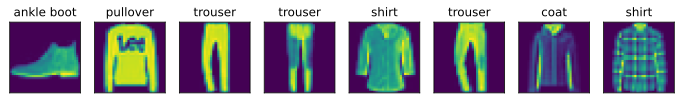

In [ ]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
  X, y = batch
  if not labels:
    labels = self.text_labels(y)
  d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

**Comments (discussions or takeaway messages)**

What would be the best batch size for this model?

#4.3. The Base Classification Model

In [ ]:
import torch
from d2l import torch as d2l

In [ ]:
class Classifier(d2l.Module):
  def validation_step(self, batch):
    Y_hat = self(*batch[:-1])
    self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
    self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [ ]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
  return torch.optim.SGD(self.parameters(), lr=self.lr)

In [ ]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
  Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
  preds = Y_hat.argmax(axis=1).type(Y.dtype)
  compare = (preds == Y.reshape(-1)).type(torch.float32)
  return compare.mean() if averaged else compare

**Comments (discussions or takeaway messages)**  
When is it good to use acurracy and other loss functions respectively?  
In case of regression models, we could use MSE or R^2 score.


#4.4. Softmax Regression Implementation from Scratch

In [ ]:
import torch
from d2l import torch as d2l

In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [ ]:
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdims=True)
  return X_exp / partition  # The broadcasting mechanism

In [ ]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1516, 0.3094, 0.2306, 0.1296, 0.1787],
         [0.1270, 0.2688, 0.1271, 0.2743, 0.2027]]),
 tensor([1., 1.]))

In [ ]:
class SoftmaxRegressionScratch(d2l.Classifier):
  def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                          requires_grad=True)
    self.b = torch.zeros(num_outputs, requires_grad=True)

  def parameters(self):
        return [self.W, self.b]

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
  X = X.reshape((-1, self.W.shape[0]))
  return softmax(torch.matmul(X, self.W) + self.b)

In [ ]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [ ]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

**Comments (discussions or takeaway messages)**

I suggest that this loss function is better.
-y*log(y_hat)-(1-y)log(1-y_hat)

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
  return cross_entropy(y_hat, y)

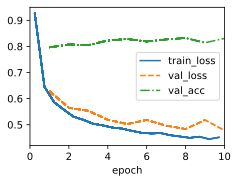

In [ ]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

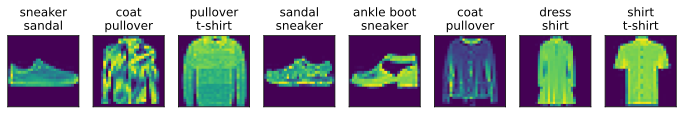

In [ ]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

#5.1. Multilayer Perceptrons

In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.2 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

In [ ]:
import torch
from d2l import torch as d2l

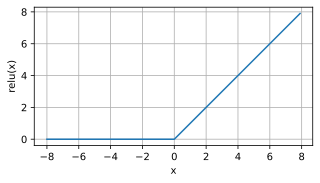

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

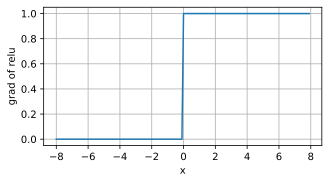

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

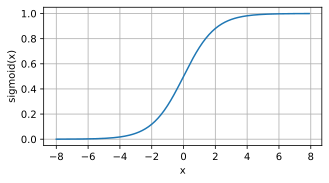

In [ ]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

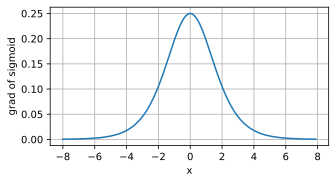

In [ ]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

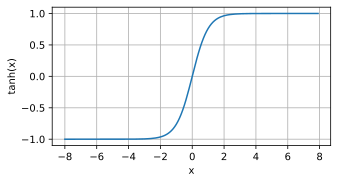

In [ ]:
y=torch.tanh(x)
d2l.plot(x.detach(),y.detach() , 'x','tanh(x)',figsize=(5,2.5))

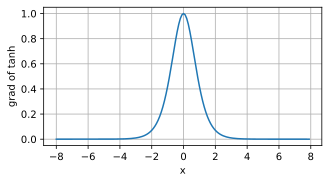

In [ ]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

**Comments (discussions or takeaway messages)**

Which activation function is the fastest during the backpropagation step? Time efficiency could be important when we fit data to perceptron models.

#5.2. Implementation of Multilayer Perceptrons

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
class MLPScratch(d2l.Classifier):
  def __init__(self,num_inputs, num_outputs, num_hiddens, lr, sigma = 0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) *sigma )
    self.b1 = nn.Parameter(torch.zeros(num_hiddens))
    self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) *sigma )
    self.b2 = nn.Parameter(torch.zeros(num_outputs))

In [ ]:
def relu(X):
  a = torch.zeros_like(X)
  return torch.max(X, a)

In [ ]:
@d2l.add_to_class(MLPScratch)
def forward(self,X):
  X = X.reshape((-1, self.num_inputs))
  H = relu(torch.matmul(X,self.W1)+self.b1)
  return torch.matmul(H,self.W2)+self.b2

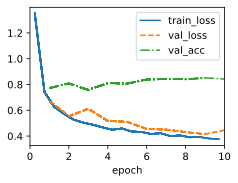

In [ ]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
class MLP(d2l.Classifier):
  def __init__(self, num_inputs, num_outputs, num_hiddens, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(nn.Flatten(),
                             nn.LazyLinear(num_hiddens),
                             nn.ReLU(),
                             nn.LazyLinear(num_outputs))

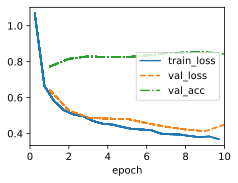

In [ ]:
model = MLP(num_inputs = 784, num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

**Comments (discussions or takeaway messages)**

How do we make implementation of general MLP, which can have various number of layer? What about using recursive function?

#5.3. Forward Propagation, Backward Propagation, and Computational Graphs


**Comments (discussions or takeaway messages)**  
What if the graph size is too big to do backpropagation?   
How can we make the backpropagation faster?

In [27]:
print(" ")